<a href="https://colab.research.google.com/github/dipascoal88/sigmoidal_data_science/blob/main/1P_Airbnb_santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos Dados do Airbnb - Santiago, Chile**

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, no Chile, e ver quais insights podem ser extraídos a partir de dados brutos. De acordo com os Dados da [Decolar](https://www.decolar.com/), o destino internacioanl com maior preferência dos brasileiros para irem nas férias de julho de 2024 é Santiago, no Chile. Por isso a escolha desse local para analisarmos os Dados. **

### Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://data.insideairbnb.com/chile/rm/santiago/2023-12-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.


Com isso em mente, vamos ao projeto.

In [46]:
# Importar dados necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Importar arquivo do listings.csv para um Dataframe
link = "https://data.insideairbnb.com/chile/rm/santiago/2023-12-26/visualisations/listings.csv"
df = pd.read_csv(link)

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço em pesos chilenos para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` -
* `license` -

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 12.284 entradas e 75 variáveis (`listings.csv.gz`).

Pode ser verificado que há 12.284 entradas com 18 variáveis. Já os tipos de variáveis podem ser verificadas com mais detalhes no código a seguir.

In [48]:
# Identificar o volume de dados do Dataframe
print("Número de entradas:")
print(df.shape[0])
print("")
print("Número de variáveis:")
print(df.shape[1])

# Identificar quais os tipos de variáveis do Dataframe
print("")
print("Tipos de variáveis:")
print(df.dtypes)

# verificar as 5 primeiras entradas do dataset
print("")
df.head(5)

Número de entradas:
12284

Número de variáveis:
18

Tipos de variáveis:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49392,Rental unit in Santiago · 1 bedroom · 1 bed,224592,Maria,NaN,Providencia,-33.43277,-70.59892,Private room,47300.0,3,0,NaN,NaN,1,178,0,NaN
1,52811,Rental unit in Providencia · ★4.42 · 1 bedroom...,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,48193.0,1,45,2021-11-04,0.28,3,86,0,NaN
2,513333,Home in Santiago · ★4.86 · 2 bedrooms · 1 bed ...,55685236,María José,NaN,Providencia,-33.42932,-70.59085,Private room,15000.0,1,70,2019-11-03,0.54,1,239,0,NaN
3,529207,Home in Santiago · 1 bedroom · 7 beds · 6 baths,2294459,Cristian,NaN,Peñalolén,-33.47754,-70.51952,Private room,533814.0,5,0,NaN,NaN,1,365,0,NaN
4,53494,Rental unit in Santiago · ★4.76 · 2 bedrooms ·...,249097,Paulina,NaN,Lo Barnechea,-33.34521,-70.29543,Entire home/apt,149999.0,2,37,2021-05-22,0.41,1,365,0,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui todos os seus valores faltantes. A `license` posssui percentual de quase 100% ausente.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos semelhantes e em quase um quarto das linhas, com aproximadamente 25%.
* As variáveis `host_name` e `preco` têm um percentual desprezível de valores ausentes.


In [8]:
# Número de valores ausentes e seus respectivos percentuais das variáveis do Dataframe

print("Números brutos de valores ausentes:")
print(df.isnull().sum())
print("")
print("Números em percentuais de valores ausentes:")
print(df.isnull().sum()/df.shape[0])

Números brutos de valores ausentes:
id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               12284
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               536
minimum_nights                        0
number_of_reviews                     0
last_review                        2979
reviews_per_month                  2979
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           12055
dtype: int64

Números em percentuais de valores ausentes:
id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000163
neighbourhood_

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

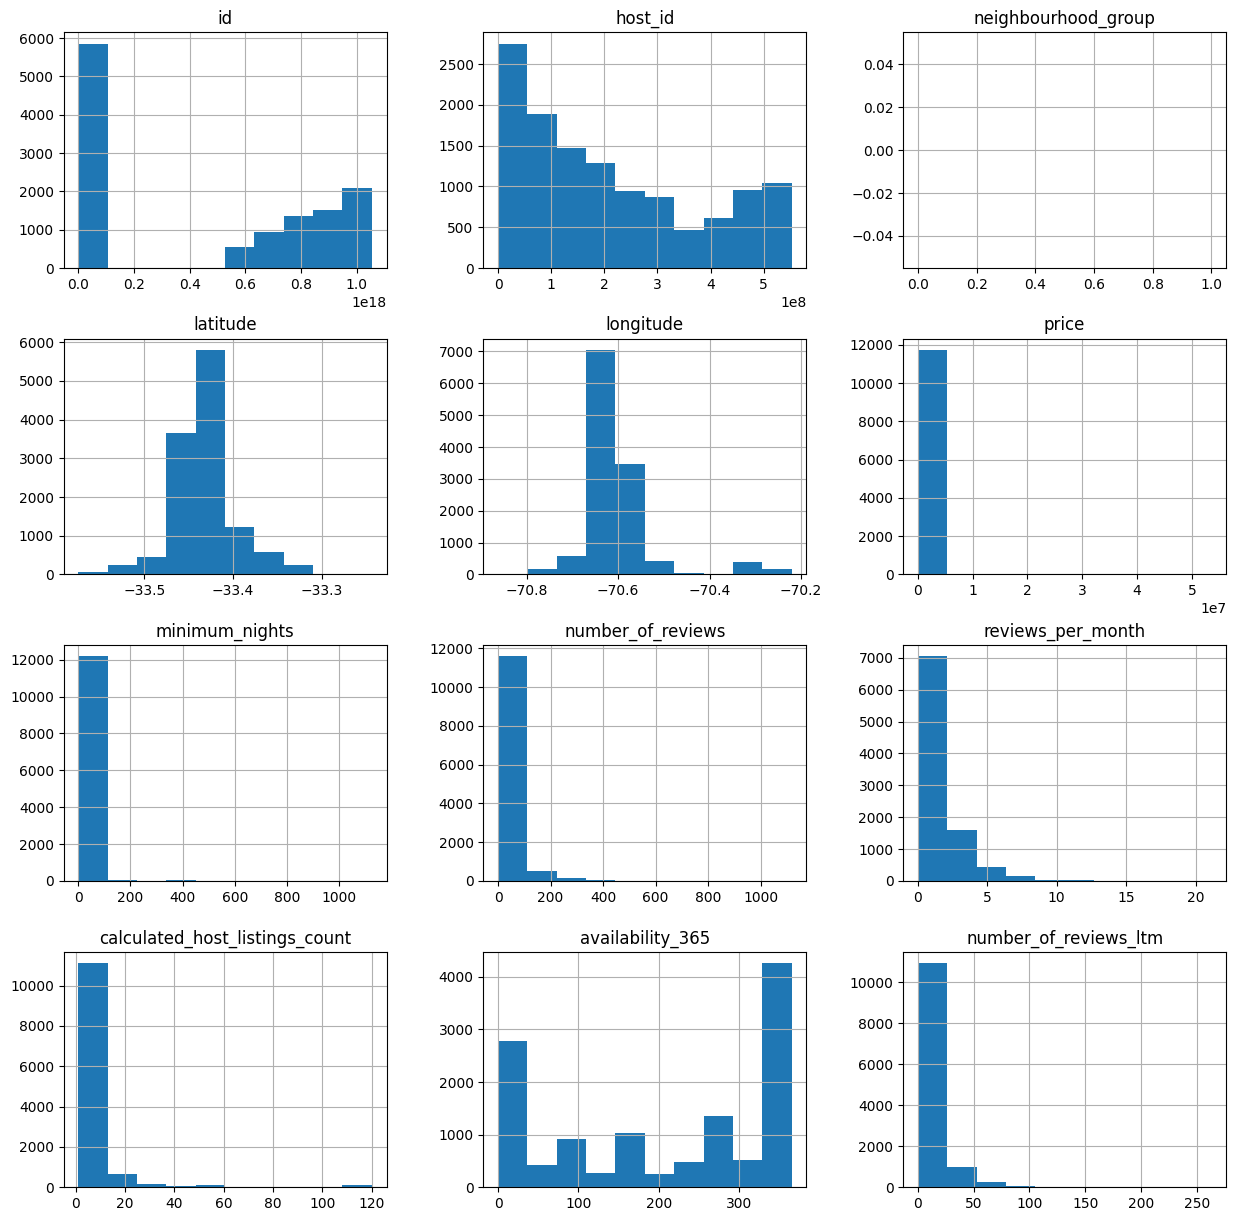

In [9]:
# Plotagem do histograma
df.hist(figsize=(15,15));

#### **Q3.1 Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico semelhantes a um tipo de distribuição estatística por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [10]:
# Resumo estatístico de todo o DataFrame
df.describe()
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,1.174800e+04,12284.000000,12284.000000,9305.000000,12284.000000,12284.000000
mean,9.092542e+04,6.701075,25.571638,1.487830,5.557473,9.180886
std,8.350313e+05,37.112770,52.609307,1.756415,13.610707,16.503832
min,7.680000e+03,1.000000,0.000000,0.010000,1.000000,0.000000
25%,3.000000e+04,1.000000,1.000000,0.290000,1.000000,0.000000
50%,4.240950e+04,2.000000,6.000000,0.890000,1.000000,2.000000
75%,6.374800e+04,3.000000,26.000000,2.050000,4.000000,11.000000
max,5.354760e+07,1124.000000,1118.000000,21.130000,120.000000,263.000000


##### Q3.1.1 Verificação e ajuste de *outliers* pelo Boxplot de `price`

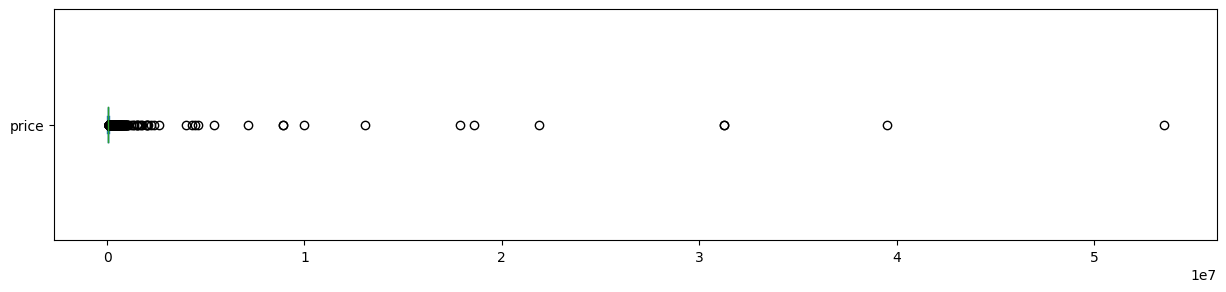

111 entradas
0.9036%


In [11]:
# price
df.price.plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# Ver a quantidade de valores acima de 500.000 pesos chilenos para prince
print("{} entradas".format(len(df[df.price>500000])))
print("{:.4f}%".format((len(df[df.price>500000])/df.shape[0])*100))

##### Q3.1.2 Verificação e ajuste de *outliers* pelo Boxplot de `minimum_nights`

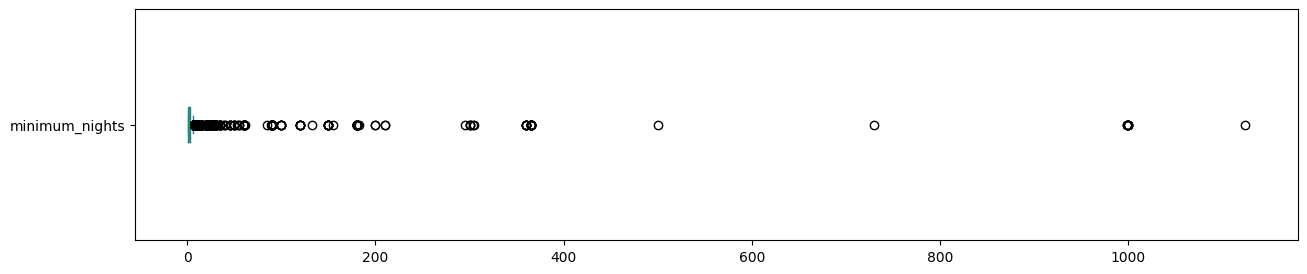

105 entradas
0.8548%


In [12]:
# minimum_nights
df['minimum_nights'].plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# Ver a quantidade de valores acima de 90 para minimum_nights
print("{} entradas".format(len(df[df.minimum_nights>90])))
print("{:.4f}%".format((len(df[df.minimum_nights>90])/df.shape[0])*100))

##### Q3.1.3 Verificação e ajuste de *outliers* pelo Boxplot de `number_of_reviews`

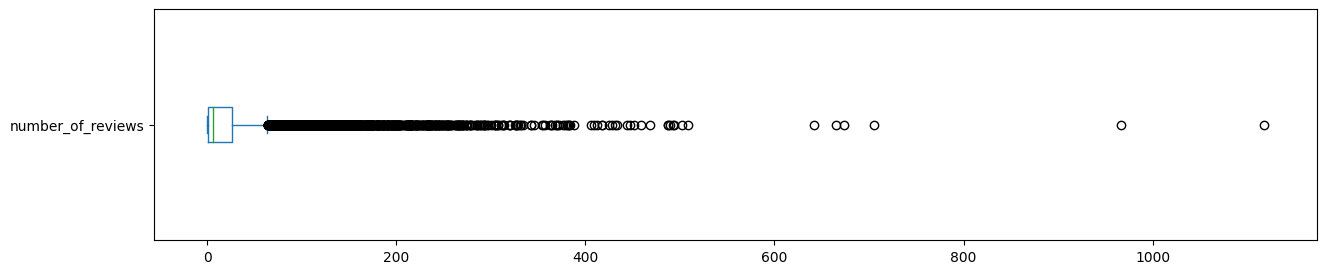

123 entradas
1.0013%


In [13]:
# number_of_reviews
df['number_of_reviews'].plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# Ver a quantidade de valores acima de 250 para number_of_reviews
print("{} entradas".format(len(df[df.number_of_reviews>250])))
print("{:.4f}%".format((len(df[df.number_of_reviews>250])/df.shape[0])*100))

##### Q3.1.4 Verificação e ajuste de *outliers* pelo Boxplot de `reviews_per_month`

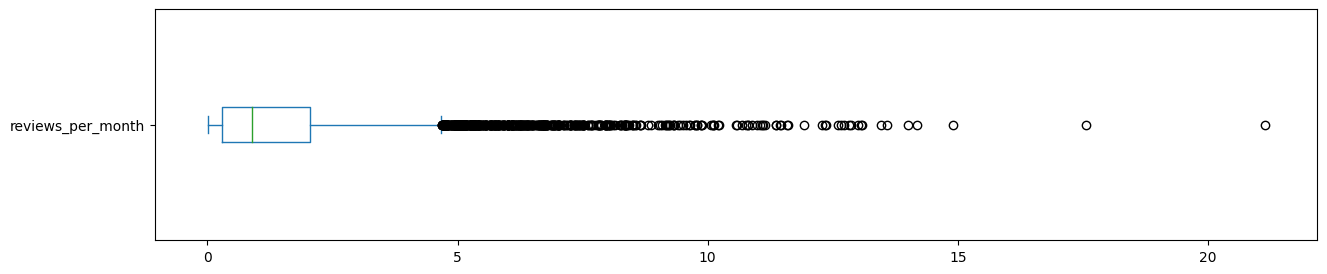

159 entradas
1.2944%


In [14]:
# reviews_per_month
df['reviews_per_month'].plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# Ver a quantidade de valores acima de 7 para reviews_per_month
print("{} entradas".format(len(df[df.reviews_per_month>7])))
print("{:.4f}%".format((len(df[df.reviews_per_month>7])/df.shape[0])*100))

##### Q3.1.5 Verificação e ajuste de *outliers* pelo Boxplot de `calculated_host_listings_count`

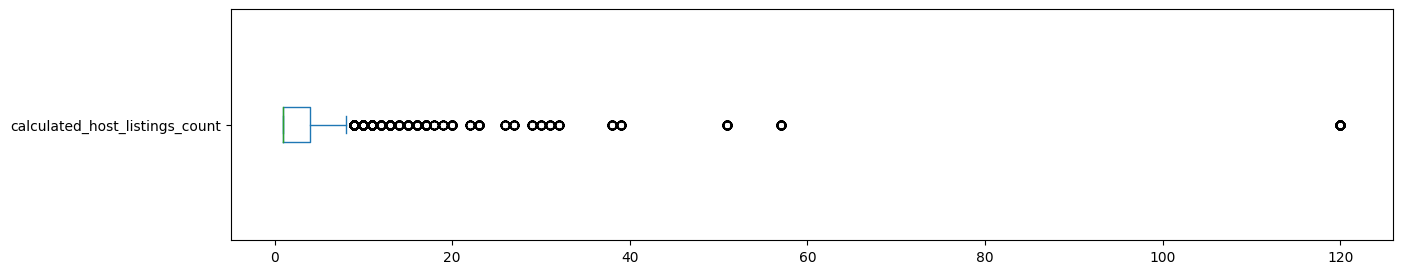

120 entradas
0.9769%


In [15]:
# calculated_host_listings_count
df['calculated_host_listings_count'].plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# Ver a quantidade de valores acima de 75 para calculated_host_listings_count
print("{} entradas".format(len(df[df.calculated_host_listings_count>75])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count>75])/df.shape[0])*100))

##### Q3.1.6 Verificação e ajuste de *outliers* pelo Boxplot de `number_of_reviews_ltm`

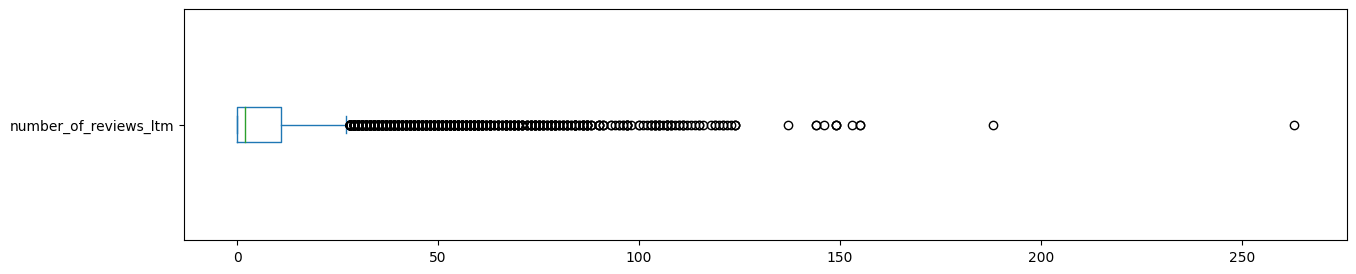

115 entradas
0.9362%


In [16]:
# number_of_reviews_ltm
df['number_of_reviews_ltm'].plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# Ver a quantidade de valores acima de 80 para number_of_reviews_ltm
print("{} entradas".format(len(df[df.number_of_reviews_ltm>80])))
print("{:.4f}%".format((len(df[df.number_of_reviews_ltm>80])/df.shape[0])*100))

#### Q.3.2 Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights` `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

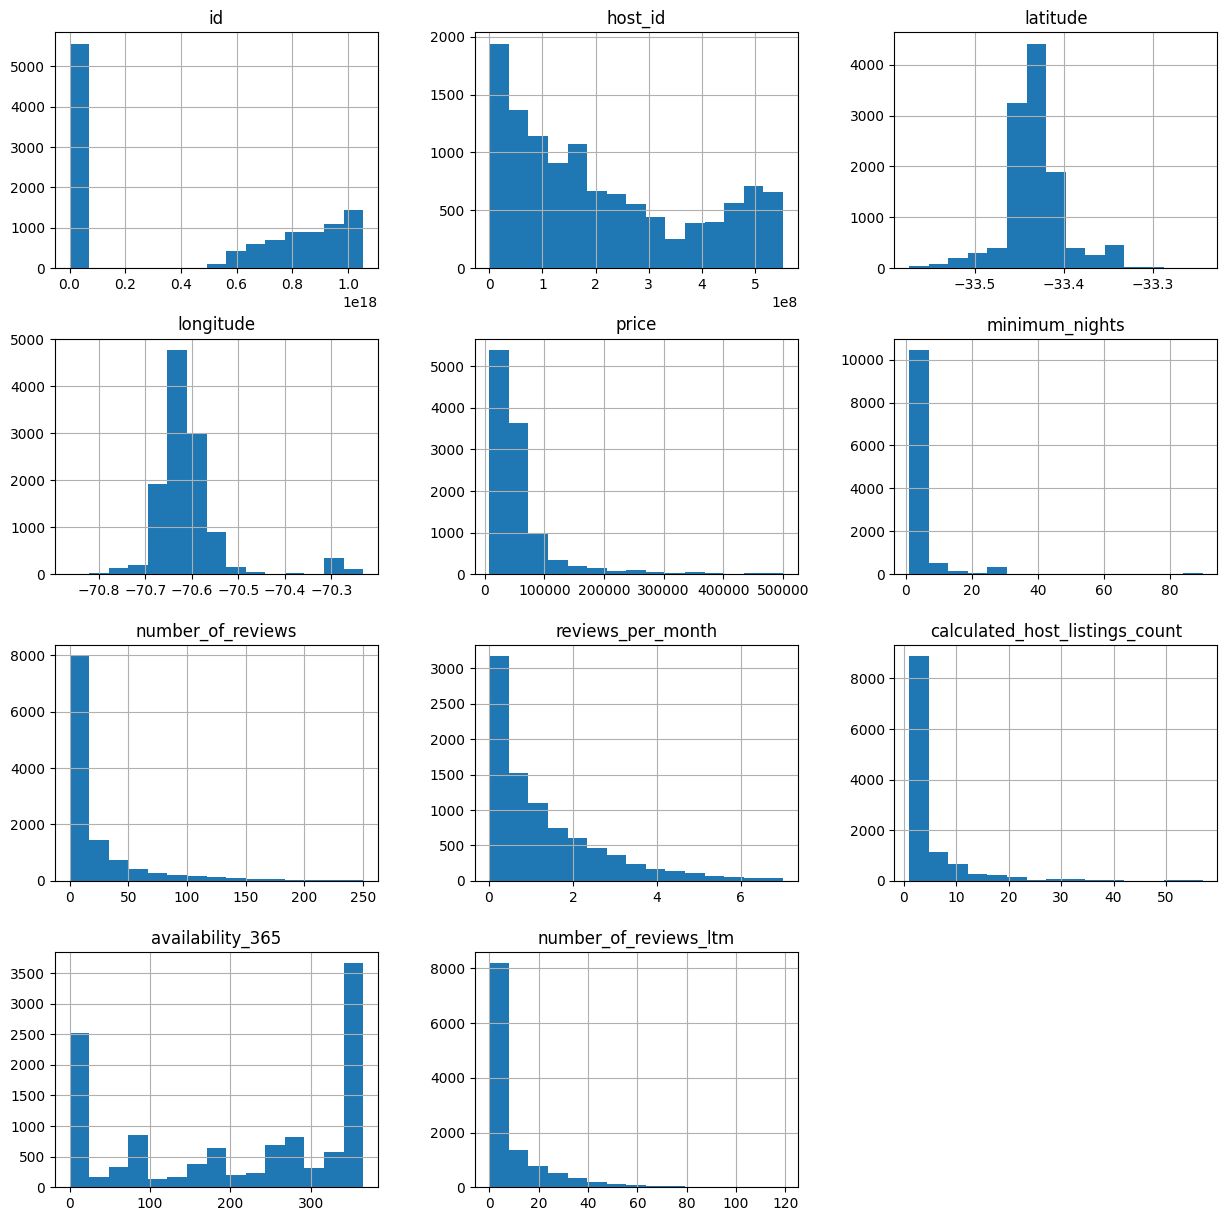

In [19]:
# Para remover os *outliers* em um novo dataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['price'] > 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > 90].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['number_of_reviews'] > 250].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['reviews_per_month'] > 7].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['calculated_host_listings_count'] > 75].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['number_of_reviews_ltm'] > 800].index, axis=0, inplace=True)

# plotar o histograma das variáveis numéricas
# Remover o campo `neighbourhood_group` por não apresentar valores
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15,figsize=(15,15));

### **Q4. Qual a média dos preços de aluguel?**

Pode-se verificar que o valor médio de preço de aluguel para a cidade de Santiago, no Chile, vale 90.925 pesos chilenos.

In [20]:
# ver a média da coluna `price`
df.price.mean()

90925.41862444671

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [29]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.012464,-0.075719,-0.167597,0.054257,0.072487,-0.102179
minimum_nights,0.012464,1.000000,-0.066630,-0.169953,-0.096594,-0.028858,-0.127469
number_of_reviews,-0.075719,-0.066630,1.000000,0.413663,0.054572,-0.011069,0.694470
reviews_per_month,-0.167597,-0.169953,0.413663,1.000000,0.033189,-0.030184,0.727819
calculated_host_listings_count,0.054257,-0.096594,0.054572,0.033189,1.000000,0.121718,0.076208
availability_365,0.072487,-0.028858,-0.011069,-0.030184,0.121718,1.000000,-0.002414
number_of_reviews_ltm,-0.102179,-0.127469,0.694470,0.727819,0.076208,-0.002414,1.000000


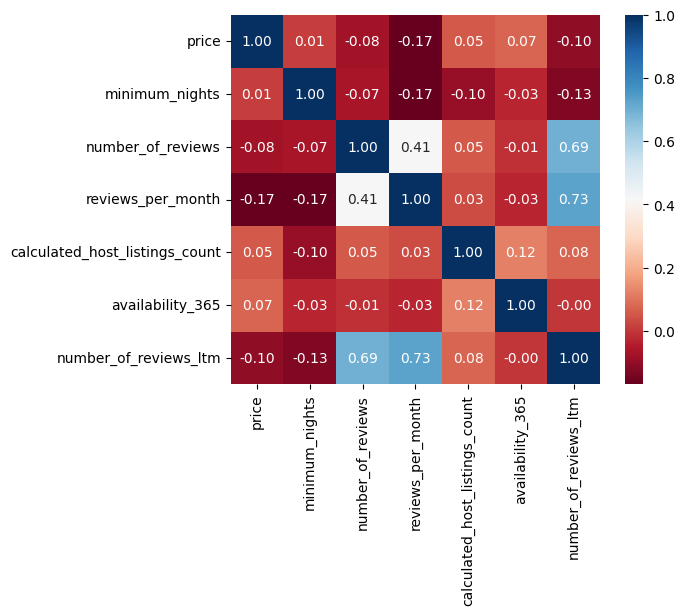

In [30]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Q6. **Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [43]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:40]

neighbourhood
Lo Barnechea           224033.882450
Vitacura                95304.009677
Las Condes              71272.020516
La Granja               69893.700000
Huechuraba              64421.439024
Pudahuel                62476.833333
Lo Espejo               55205.000000
Providencia             54806.496520
Quilicura               54426.428571
San Miguel              47344.466667
Recoleta                46985.914530
Cerrillos               45219.545455
Peñalolén               43673.075949
Ñuñoa                   43205.687500
La Reina                41881.217391
La Florida              41736.934959
Santiago                41282.436287
Maipú                   40599.838384
San Joaquín             38965.092308
Estación Central        38692.279793
La Cisterna             35688.315789
Macul                   33782.762963
Quinta Normal           33569.973684
Conchalí                33052.000000
Lo Prado                30500.444444
Pedro Aguirre Cerda     30235.500000
Renca                   

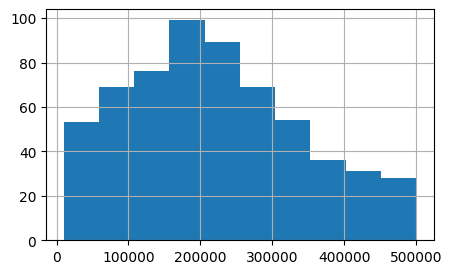

In [69]:
# Ver se a distribuição de preços no bairro de Lo Barnechea tem *outliers*
df_b = df_clean[df_clean.neighbourhood == 'Lo Barnechea']
df_b.price.hist(figsize=(5,3));

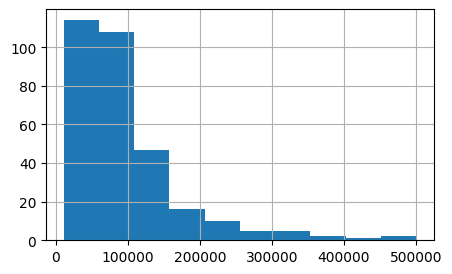

In [71]:
# Ver se a distribuição de preços no bairro de Vitacura tem *outliers*
df_v = df_clean[df_clean.neighbourhood == 'Vitacura']
df_v.price.hist(figsize=(5,3));

Através da análise pode-se verificar que os bairros afastados do centro urbano e mais próximos às monhanas dos Andes tem uma média mais cara de aluguel por serem mais espaçosos, luxuosos, confortáveis e mais perto do mais famoso ponto turístico natural da região. Já os próximos ao centro turístico histórico e cultural são menos caros do que os citados anteriormente.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

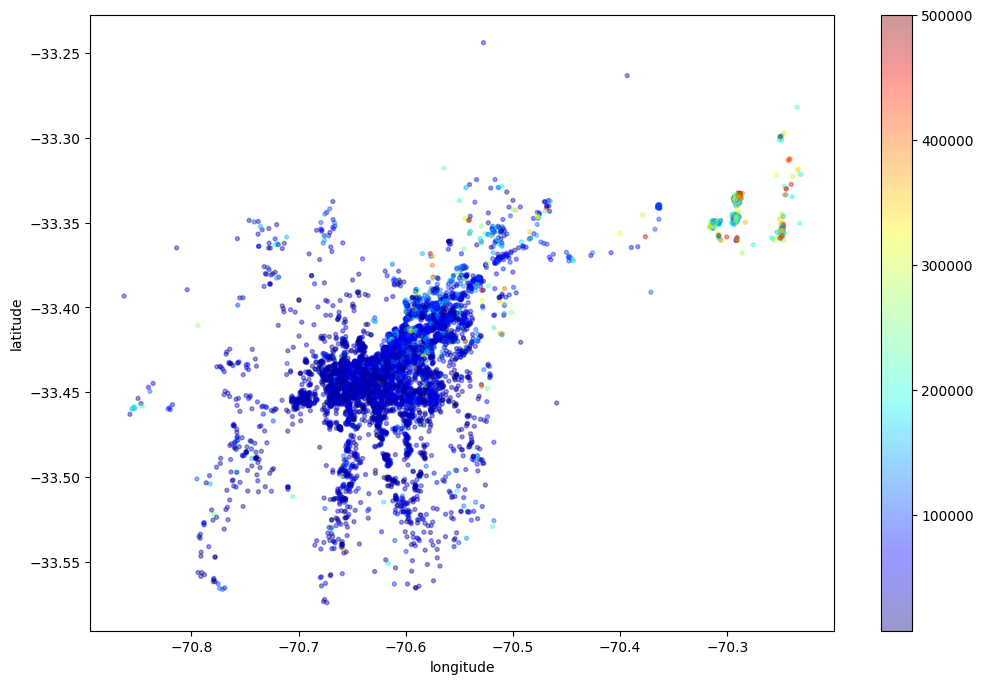

In [38]:
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"], s=8, cmap=plt.get_cmap("jet"), figsize=(12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

De modo semelhante ao calculado anteriormente, porém com outra variável, foi a utilização da função `mean()`. Nesse caso, utilizaremos o dataFrame sem os *outliers*.

In [44]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

4.136806981519507

Nota-se que o valor médio do mínimo de noites para alugar em santiago são de 4 noites, ou seja, é praticamente o tempo médio para passar uma semana nesta localidade.

## **Conclusões**

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém, já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que algumas localizades (bairros) há uma distribuição concentrada de preços nos imóveis disponíveis, o que ocasiona uma distorção das informações estatísticas dos preços.

Por fim, lembre-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória o conjunto de dados completos, com 75 atributos disponíveis.